In [1]:
import pandas as pd
import matplotlib.pyplot as pt
data = pd.read_csv("data.csv", low_memory = False)
# data.columns
data['DATE'] = pd.to_datetime(data['EVENT_DATE'])
def to_year(date): return date.year
data['YEAR'] = data['DATE'].apply(to_year)

In [2]:
a1f = data[['ACTOR1', 'FATALITIES', 'YEAR']].rename(index=str, columns={"ACTOR1": "ACTOR"})
a2f = data[['ACTOR2', 'FATALITIES', 'YEAR']].rename(index=str, columns={"ACTOR2": "ACTOR"})
all_actors = pd.DataFrame(a1f.append(a2f))

## Top 10 conflicts by actor

In [3]:
top10conflicts = pd.DataFrame(all_actors.groupby(all_actors['ACTOR']).size().reset_index(name="Counts").sort_values(by='Counts', ascending = False)[0:10])

top10actors_conflict = []
for actor in top10conflicts['ACTOR']:
    top10actors_conflict.append(actor)

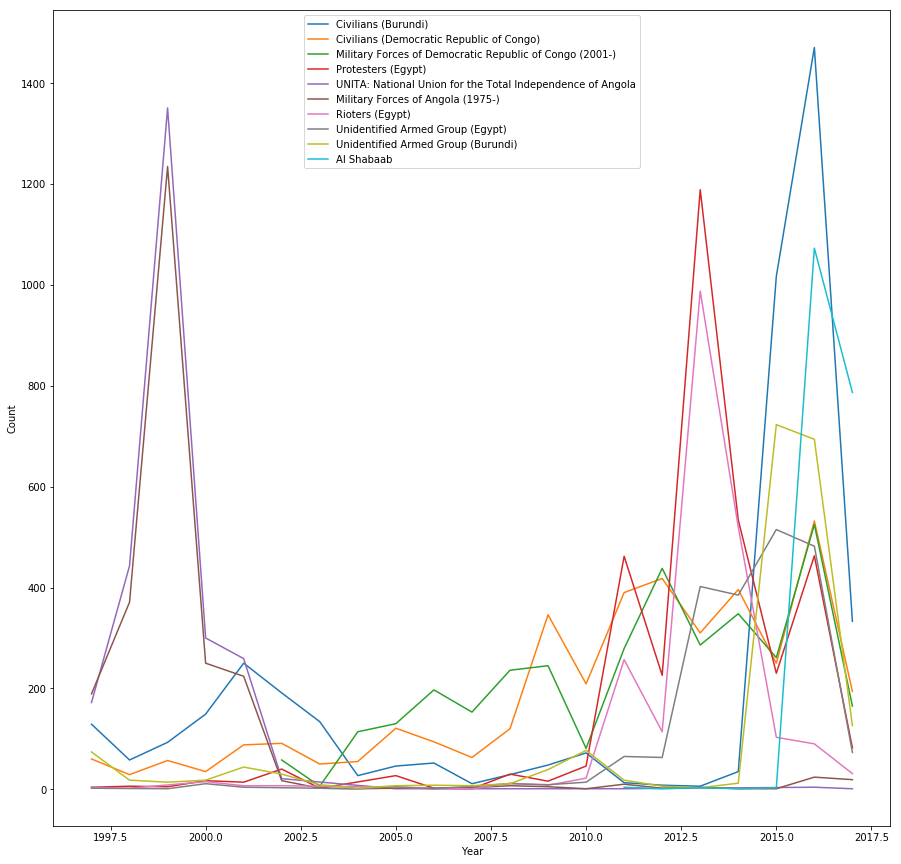

In [10]:
pt.rcParams['figure.figsize'] = [15, 15]
tops = []
legend = []

for i in range(10):
    top = all_actors[all_actors['ACTOR'] == top10actors_conflict[i]]
    top_sorted = top.groupby(top['YEAR']).size().reset_index(name="Counts").sort_values(by='YEAR', ascending = False)
    tops.append(top_sorted)
    legend.append(top10actors_conflict[i])
    
for g in tops:
    pt.plot(g['YEAR'], g['Counts'])

pt.legend(legend)
pt.xlabel("Year")
pt.ylabel("Count")
pt.show()
# pt.savefig('counts.png')

## Total Fatalities over time

In [5]:
to_plot = data.sort_values(by='YEAR')

# pd.DataFrame(to_plot.groupby(to_plot['YEAR'])['FATALITIES'].sum()).plot()#.size().reset_index(name="Counts").sort_values(by='Counts', ascending = False)[0:10])

## Top 10 fatality counts by Actor

In [6]:
# all_actors.groupby(['ACTOR'])['FATALITIES'].sum().sort_values(ascending = False)

In [7]:
top10f = []
for actor, fatalities in all_actors.groupby(['ACTOR'])['FATALITIES'].sum().sort_values(ascending=False).iteritems():
    top10f.append(actor)

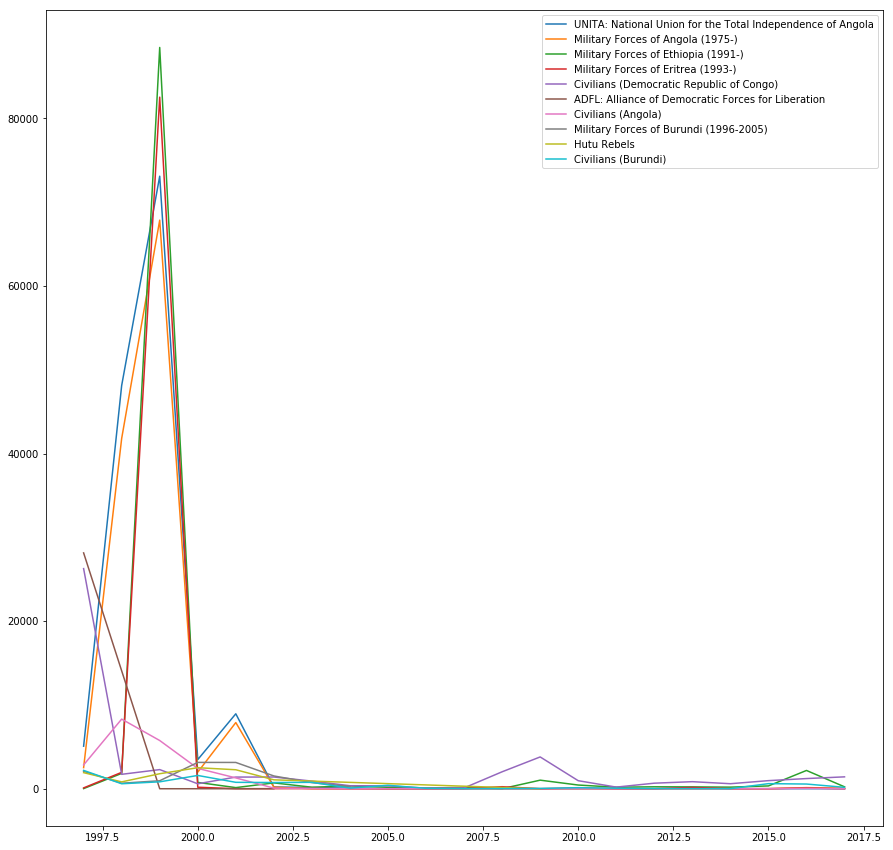

In [11]:
tops = []
legend = []

for i in range(10):
    legend.append(top10f[i])
    current = all_actors[all_actors['ACTOR'] == top10f[i]]
    current_sorted = current.sort_values(by='YEAR', ascending = False)
    frame = current_sorted.groupby(current_sorted['YEAR'])['FATALITIES'].sum()
    tops.append(frame)

for top in tops:
    pt.plot(top)
    
pt.legend(legend)
pt.show()
# pt.savefig('fatal.png')

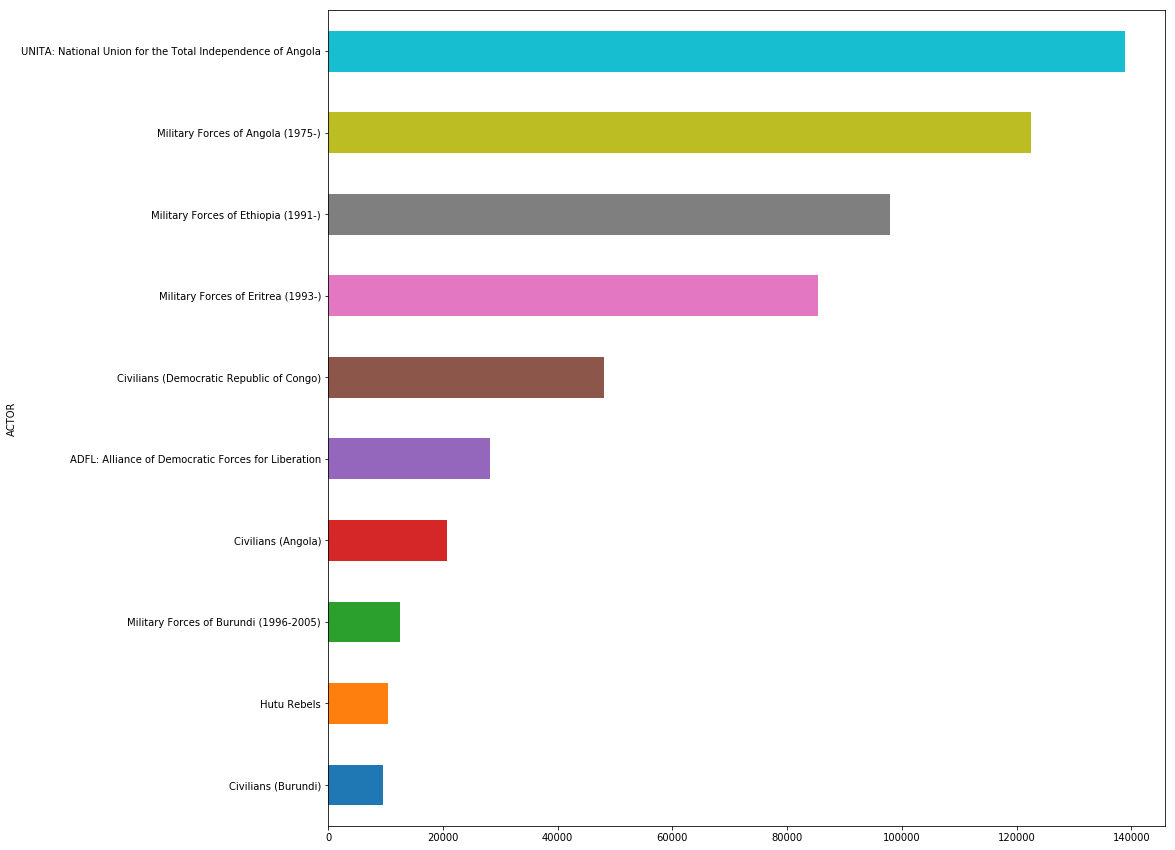

In [9]:
all_actors.groupby(['ACTOR'])['FATALITIES'].sum().sort_values(ascending=True)[-10:].plot(kind = 'barh')
pt.savefig('bar.png')